##Project Assignment Module 1

In [ ]:
#Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load the dataset from Google Drive
df = pd.read_csv('/content/drive/MyDrive/MachineLearningProject/Review.csv')

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#Dimensions of the dataframe
df.shape

(10841, 13)

In [ ]:
#Checking missing values
df.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


There are 1474 values missing in Rating column, 1 in Type, 1 in Content Rating, 8 in Current Version and 3 in Android Version.

### Handling Missing Values

In [ ]:
#Filling missing data in 'Rating' column with mean
mean_rating = df['Rating'].mean()
df['Rating'] = df['Rating'].fillna(mean_rating)

In [ ]:
#missing 'Type' - filling it with the mode
mode_type = df['Type'].mode()[0]
df['Type'] = df['Type'].fillna(mode_type)

In [ ]:
#Filling 'Content Rating' with the most common content rating(mode)
mode_content_rating = df['Content Rating'].mode()[0]
df['Content Rating'] = df['Content Rating'].fillna(mode_content_rating)

In [ ]:
#Current version and android version - filling it with a placeholde 'Varies with device'
df['Current Ver'] = df['Current Ver'].fillna('Varies with device')
df['Android Ver'] = df['Android Ver'].fillna('Varies with device')

In [ ]:
df.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [ ]:
#Cleaning the size column since it has values as 19M, 2M etc

def convert_size(size_str):
    if size_str.endswith('M'):
        return float(size_str[:-1]) * 1024        #Converting MB to KB
    elif size_str.endswith('k'):
        return float(size_str[:-1])
    elif size_str == 'Varies with device':
        return np.nan                             #Assigning NaN for inconsistent entries
    else:
        return np.nan                             #Assigning NaN for any other unexpected formats

df['Size'] = df['Size'].apply(convert_size)


In [ ]:
#To check if the size column has been affected by the changes made
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [ ]:
#Cleaning the Installs column as it has values like 10000+ and removing '+' and ',' from the 'Installs' column and converting to int
print(df['Installs'].unique())

['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0'
 'Free']


In [ ]:
#Replacing 'Free' and any other non-numeric values with NaN
df['Installs'] = df['Installs'].replace('Free', np.nan)

In [ ]:
#Removing any non-digit characters
df['Installs'] = df['Installs'].str.replace(r'\D', '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

In [ ]:
#Fill NaN with zero
df['Installs'] = df['Installs'].fillna(0)
df['Installs'] = df['Installs'].astype(int)

In [ ]:
df['Installs'].head()

,Installs
0,10000
1,500000
2,5000000
3,50000000
4,100000


In [ ]:
print(df['Installs'].isnull().sum())

0


### Cleaning the Price Column

In [ ]:
print(df['Price'].dtype)
print(df['Price'].unique())

object
['0' '$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49'
 '$1.99' '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99'
 '$11.99' '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49'
 '$10.99' '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95'
 '$4.49' '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99'
 '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49'
 '$1.29' '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$19.90' '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99'
 '$3.08' '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04'
 '$4.29' '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97'
 '$200.00' '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1.26' 'Everyone'
 '$1.20' '$1.04']


In [ ]:
#Removing rows with non-numeric values like 'Everyone'
df = df[df['Price'].str.contains(r'^\$?\d+\.?\d*$', regex=True)]

In [ ]:
#Removing the dollar sign
df['Price'] = df['Price'].str.replace(r'^\$', '', regex=True)

In [ ]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [ ]:
#Converting the Last Updated column to DateTime
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


### Genre Column

In [ ]:
#Extracting the main genre by splitting on ';' and taking the first part
df['Genres'] = df['Genres'].apply(lambda x: x.split(';')[0])

In [ ]:
#Function to extract numeric part of 'Android Ver'
def extract_android_ver(ver):
    if 'Varies with device' in ver:
        return np.nan
    else:
        parts = ver.split()
        for part in parts:
            try:
                return float(part)
            except ValueError:
                continue
        return np.nan

df['Android Ver'] = df['Android Ver'].apply(extract_android_ver)

In [ ]:
df['Android Ver'].unique()

array([nan, 4.2, 4.4, 2.3, 3. , 4.1, 4. , 2.2, 5. , 6. , 1.6, 1.5, 2.1,
       7. , 5.1, 4.3, 2. , 3.2, 7.1, 8. , 3.1, 1. ])

In [ ]:
#Removing rows where 'Android Ver' is NaN
df = df.dropna(subset=['Android Ver'])

In [ ]:
df.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,336
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


### Size Column

In [ ]:
#Filling NaN values in 'Size' with the mean of the column
df['Size'] = df['Size'].fillna(df['Size'].mean())

In [ ]:
df.shape

(7673, 13)

In [ ]:
#Function to clean the 'Current Ver' column
def clean_current_ver(ver):
    if not isinstance(ver, str) or not bool(re.search(r'\d', ver)):
        return np.nan

    ver = re.sub(r'(?i)[vV]ersion|Build|Release|Android|\[|\]|\-', '', ver)
    ver = re.sub(r'[^0-9.]', '', ver)

    if ver == '':
        return np.nan

    return ver

In [ ]:
df['Current Ver'] = df['Current Ver'].apply(clean_current_ver)

In [ ]:
df['Current Ver'].isnull().sum()

154

In [ ]:
#Removing rows where 'Current Ver' is NaN
df = df.dropna(subset=['Current Ver'])

In [ ]:
df.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [ ]:
df.shape

(7519, 13)

In [ ]:
#Removing duplicate rows
df = df.drop_duplicates()

In [ ]:
df.shape

(7247, 13)

In [ ]:
#Reset dataframe index
df = df.reset_index(drop=True)

In [ ]:
print(df.dtypes)

App                       object
Category                  object
Rating                   float64
Reviews                   object
Size                     float64
Installs                   int64
Type                      object
Price                     object
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver              float64
dtype: object


In [ ]:
df['Reviews'] = df['Reviews'].astype(int)

In [ ]:
df['Price'] = df['Price'].astype(float)

In [ ]:
df.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,int64
Size,float64
Installs,int64
Type,object
Price,float64
Content Rating,object
Genres,object


In [ ]:
df = df.dropna(subset=['Last Updated'])

In [ ]:
#Renaming columns
df.rename(columns={
    'Current Ver': 'Current Version',
    'Android Ver': 'Android Version'
}, inplace=True)


In [ ]:
#Replacing underscores with spaces
df['Category'] = df['Category'].str.replace('_', ' ')
df['Category'] = df['Category'].str.title()

In [ ]:
df.head(8)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Version,Android Version
0,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design,2018-06-20,1.1,4.4
1,Paper flowers instructions,Art And Design,4.4,167,5734.4,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1,2.3
2,Infinite Painter,Art And Design,4.1,36815,29696.0,1000000,Free,0.0,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2
3,Garden Coloring Book,Art And Design,4.4,13791,33792.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0
4,Text on Photo - Fonteee,Art And Design,4.4,13880,28672.0,1000000,Free,0.0,Everyone,Art & Design,2017-10-27,1.0.4,4.1
5,Name Art Photo Editor - Focus n Filters,Art And Design,4.4,8788,12288.0,1000000,Free,0.0,Everyone,Art & Design,2018-07-31,1.0.15,4.0
6,Tattoo Name On My Photo Editor,Art And Design,4.2,44829,20480.0,10000000,Free,0.0,Teen,Art & Design,2018-04-02,3.8,4.1
7,Mandala Coloring Book,Art And Design,4.6,4326,21504.0,100000,Free,0.0,Everyone,Art & Design,2018-06-26,1.0.4,4.4


In [ ]:
df.to_csv('cleaned_data.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Exploratory Data Analysis

In [ ]:
df.describe()

,Rating,Reviews,Size,Installs,Price,Last Updated,Android Version
count,7247.000000,7.247000e+03,7247.000000,7.247000e+03,7247.000000,7247,7247.000000
mean,4.170364,2.561067e+05,21785.420624,7.755333e+06,1.112692,2017-10-20 18:41:16.831792640,3.880116
min,1.000000,0.000000e+00,8.500000,0.000000e+00,0.000000,2010-05-21 00:00:00,1.000000
25%,4.000000,2.300000e+01,5017.600000,1.000000e+03,0.000000,2017-07-31 12:00:00,4.000000
50%,4.200000,7.830000e+02,14336.000000,1.000000e+05,0.000000,2018-05-02 00:00:00,4.100000
75%,4.500000,2.502800e+04,28672.000000,1.000000e+06,0.000000,2018-07-16 00:00:00,4.200000
max,5.000000,4.489389e+07,102400.000000,1.000000e+09,400.000000,2018-08-08 00:00:00,8.000000
std,0.508979,1.709299e+06,22739.944979,4.806193e+07,16.976346,NaN,0.880507


### Distribution of App Ratings

This histogram displays the distribution of app ratings in the dataset. The majority of apps have ratings between 4.0 and 4.5, with a clear peak around 4.0, indicating that most apps are rated favorably by users. Very few apps have ratings below 3.0, suggesting that poorly rated apps are less common in the dataset.

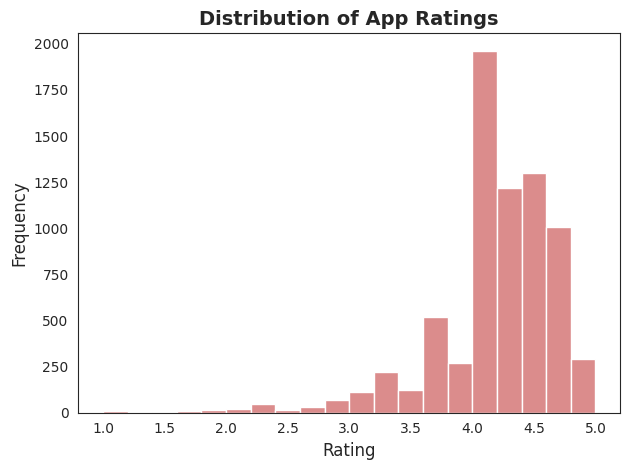

In [ ]:
sns.set_style("white")
sns.histplot(df['Rating'], bins=20, color='indianred', alpha=0.7)

plt.title('Distribution of App Ratings', fontsize=14, fontweight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

### Number of Apps per Category

This bar plot illustrates the number of apps per category in the dataset. The Family category has the highest number of apps (1,462), followed by Games (827) and Tools (625). Categories like Beauty and Comics have the fewest apps, indicating that some categories are much more saturated than others.

<ipython-input-53-bb28131f5a06>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=apps_per_category.values, y=apps_per_category.index, palette='flare', alpha=0.8, saturation=0.9)


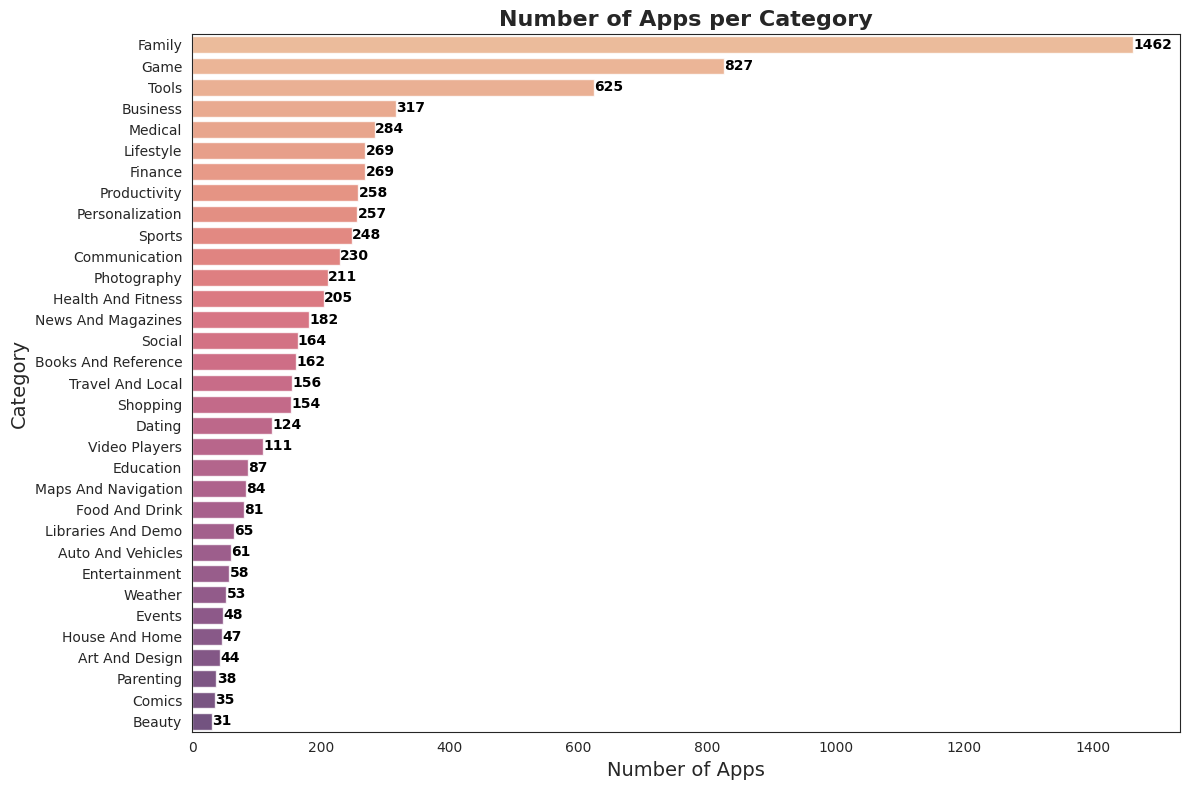

In [ ]:
apps_per_category = df['Category'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=apps_per_category.values, y=apps_per_category.index, palette='flare', alpha=0.8, saturation=0.9)

plt.title('Number of Apps per Category', fontsize=16, fontweight='bold')
plt.xlabel('Number of Apps', fontsize=14)
plt.ylabel('Category', fontsize=14)

for i, v in enumerate(apps_per_category.values):
    plt.text(v + 0.5, i, str(v), color='black', fontweight='bold', ha='left', va='center')

plt.tight_layout()
plt.show()

 ### Correlation Heatmap of Numerical Variables

This heatmap visualizes the correlations between numerical variables in the dataset. It shows that Installs and Reviews have a strong positive correlation (0.65), suggesting that apps with more installs tend to have more reviews. Most other correlations are weak, indicating that variables such as Rating, Size, and Price have little to no linear relationship with each other.

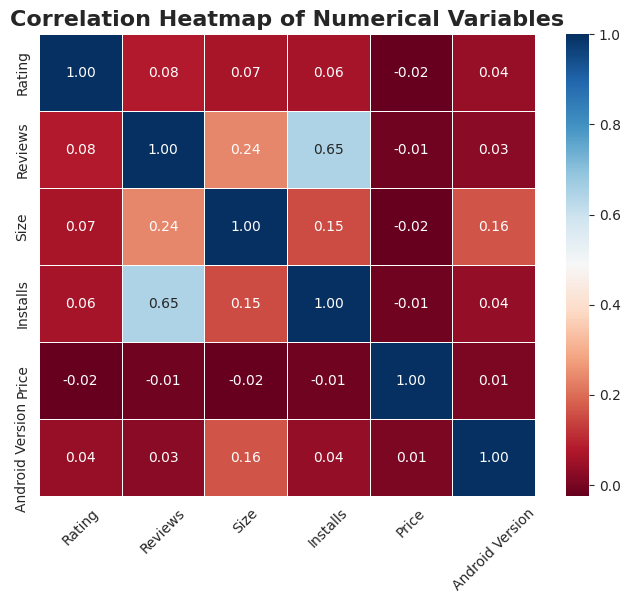

In [ ]:
#Numerical columns
numerical_cols = ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Android Version']

corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix,
            annot=True,
            cmap="RdBu",
            fmt=".2f",
            linewidths=.5,
            annot_kws={"size": 10}
           )

plt.title('Correlation Heatmap of Numerical Variables', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

### Top 10 Genres by Number of Apps

<ipython-input-55-774e430c2527>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')


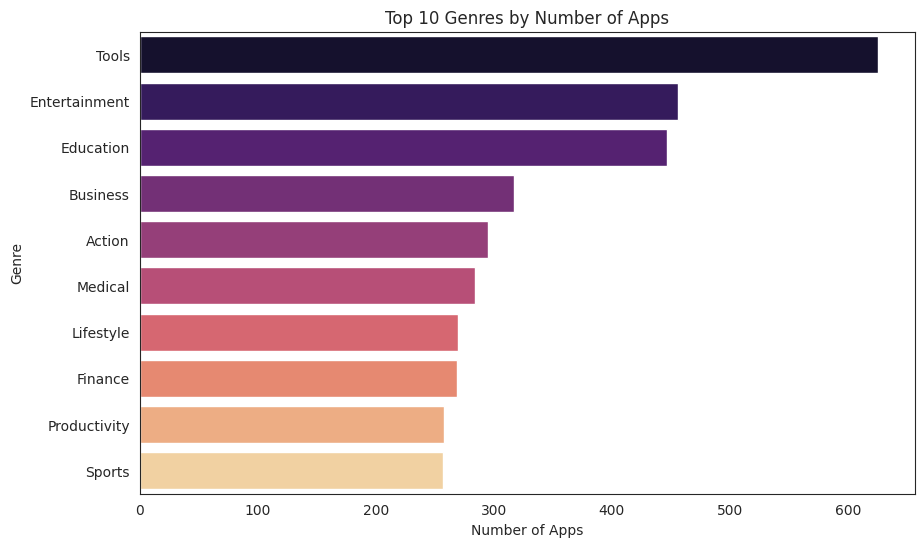

In [ ]:
df['Primary Genre'] = df['Genres'].str.split(';').str[0]
top_genres = df['Primary Genre'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')
plt.title('Top 10 Genres by Number of Apps')
plt.xlabel('Number of Apps')
plt.ylabel('Genre')
plt.show()

### Trend of App Updates over time

This line plot shows the trend of app updates over time, with a significant increase in updates starting around mid-2017 and peaking sharply in early 2018. Before 2017, the number of updates remained relatively stable and low. The sharp rise suggests either an increase in app development activity or changes in update policies in the later years of the dataset.

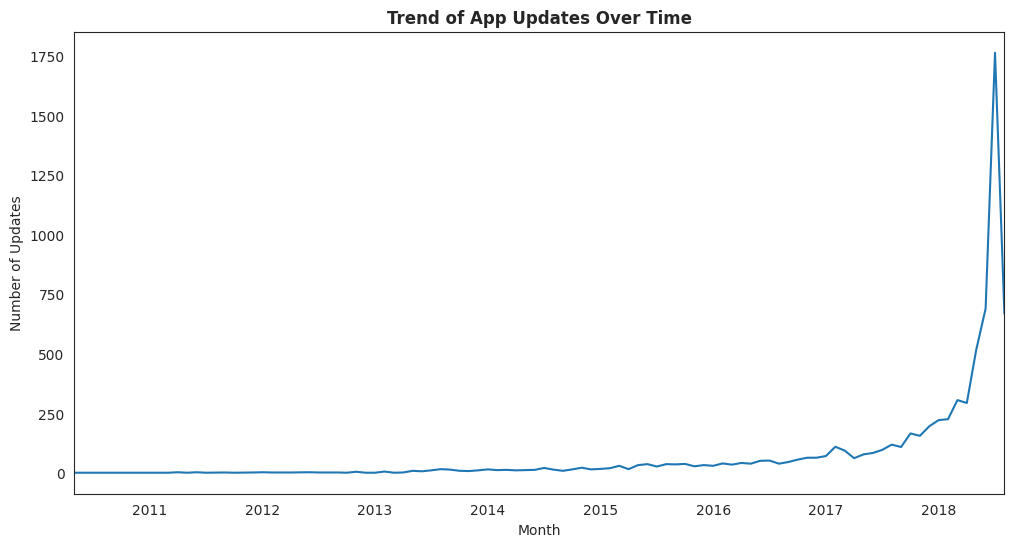

In [ ]:
updates_over_time = df['Last Updated'].dt.to_period('M').value_counts().sort_index()
plt.figure(figsize=(12, 6))
updates_over_time.plot()
plt.title('Trend of App Updates Over Time', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Updates')
plt.show()

### Proportion of Free and Paid Apps

This pie chart displays the proportion of free vs. paid apps in the dataset. A significant majority of the apps, 92.1%, are free, while only 7.9% are paid. This indicates that free apps dominate the Google Play Store, with relatively few apps requiring payment.

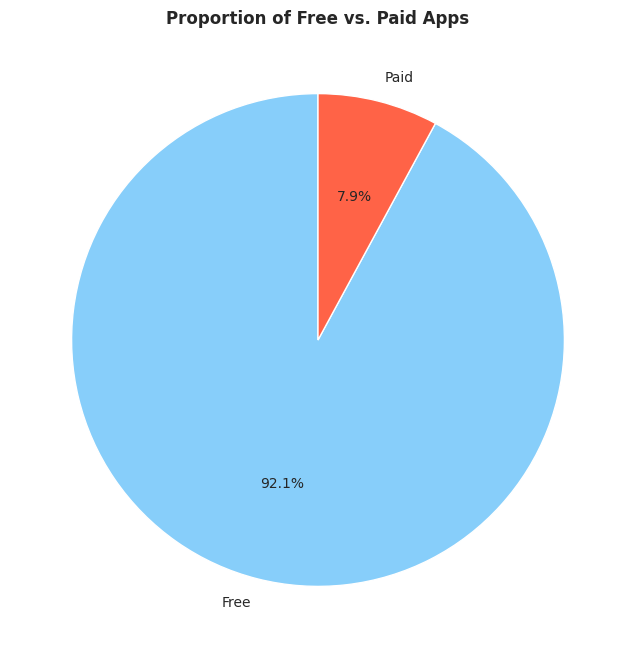

In [ ]:
app_types = df['Type'].value_counts()

plt.figure(figsize=(8, 8))
app_types.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightskyblue', 'tomato'])
plt.title('Proportion of Free vs. Paid Apps', fontweight='bold')
plt.ylabel('')
plt.show()

### App ratings by Price Tier

This violin plot displays the distribution of app ratings across different price tiers: Free, Affordable, and Expensive. The ratings are fairly consistent across the three tiers, with the median rating for all tiers hovering around 4.0. However, free apps show a slightly wider spread in their ratings, indicating more variability in user satisfaction compared to paid apps.

In [ ]:
#Creating price tiers
def price_tier(price):
    if price == 0:
        return 'Free'
    elif price <= 5:
        return 'Affordable'
    else:
        return 'Expensive'

df['Price Tier'] = df['Price'].apply(price_tier)

<ipython-input-59-cbd1a973bdb9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Price Tier', y='Rating', data=df, palette="Set2")


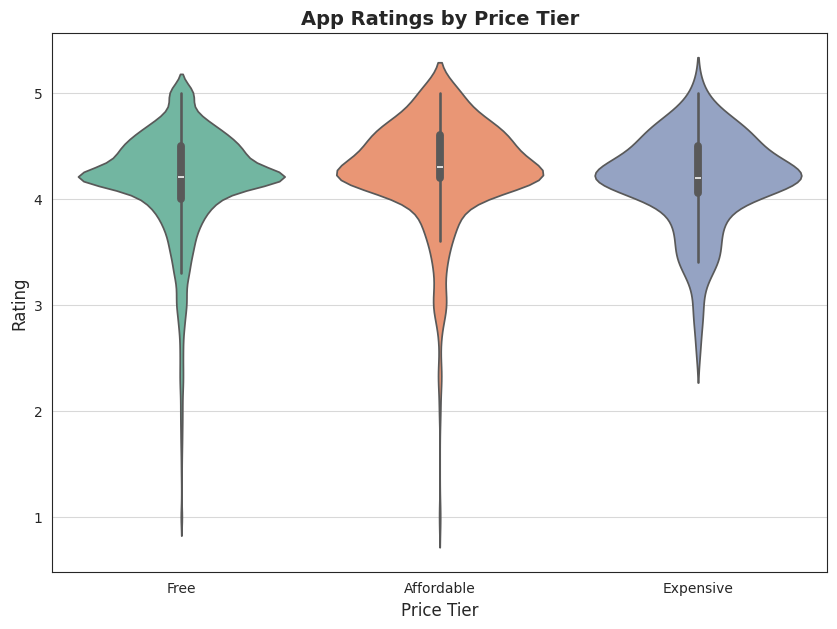

In [ ]:
plt.figure(figsize=(10, 7))
sns.violinplot(x='Price Tier', y='Rating', data=df, palette="Set2")

plt.grid(axis='y', alpha=0.75)
plt.title('App Ratings by Price Tier', fontsize=14, fontweight='bold')
plt.xlabel('Price Tier', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.show()

### App counts per category by content rating

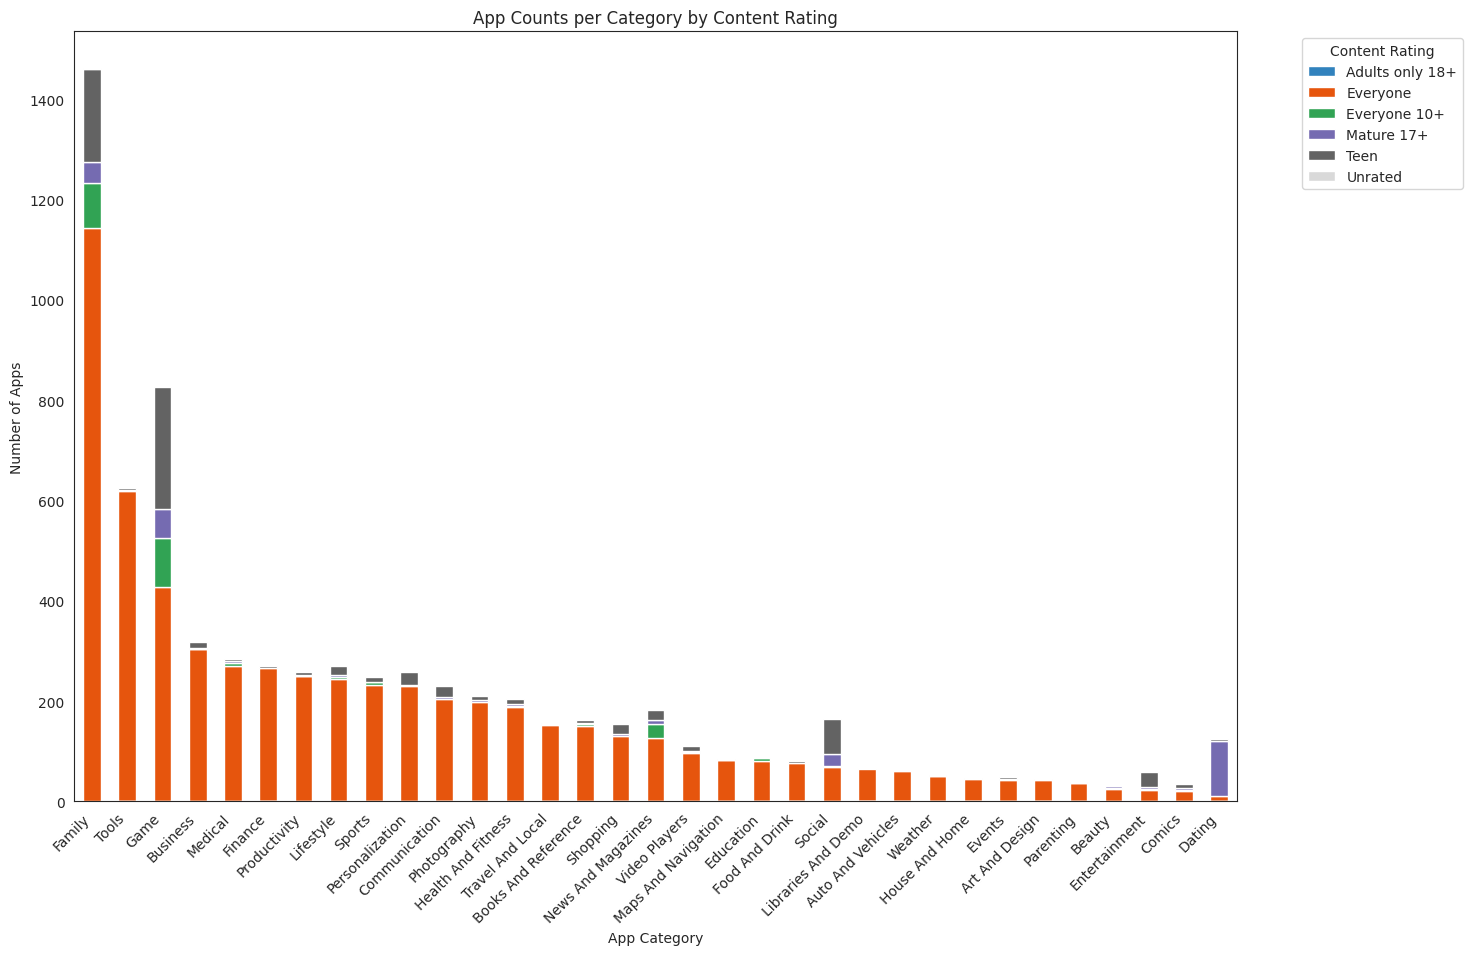

In [ ]:
df['Content Rating'] = df['Content Rating'].str.strip()
category_content_counts = df.pivot_table(index='Category', columns='Content Rating', values='App', aggfunc='count', fill_value=0)

if 'Everyone' in category_content_counts.columns:
    category_content_counts = category_content_counts.sort_values(by='Everyone', ascending=False)
else:
    category_content_counts = category_content_counts.sort_index()

category_content_counts.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='tab20c')
plt.title('App Counts per Category by Content Rating')
plt.xlabel('App Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Content Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Pairplot of numerical app features

This pairplot shows the relationships between multiple numerical app features, including Rating, Reviews, Size, Installs, and Price. Diagonal plots display the distribution of each variable, while off-diagonal scatter plots show pairwise relationships. The plot highlights that Installs and Reviews have a noticeable linear relationship, while most other variables, such as Price and Rating, show no clear correlation.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable h

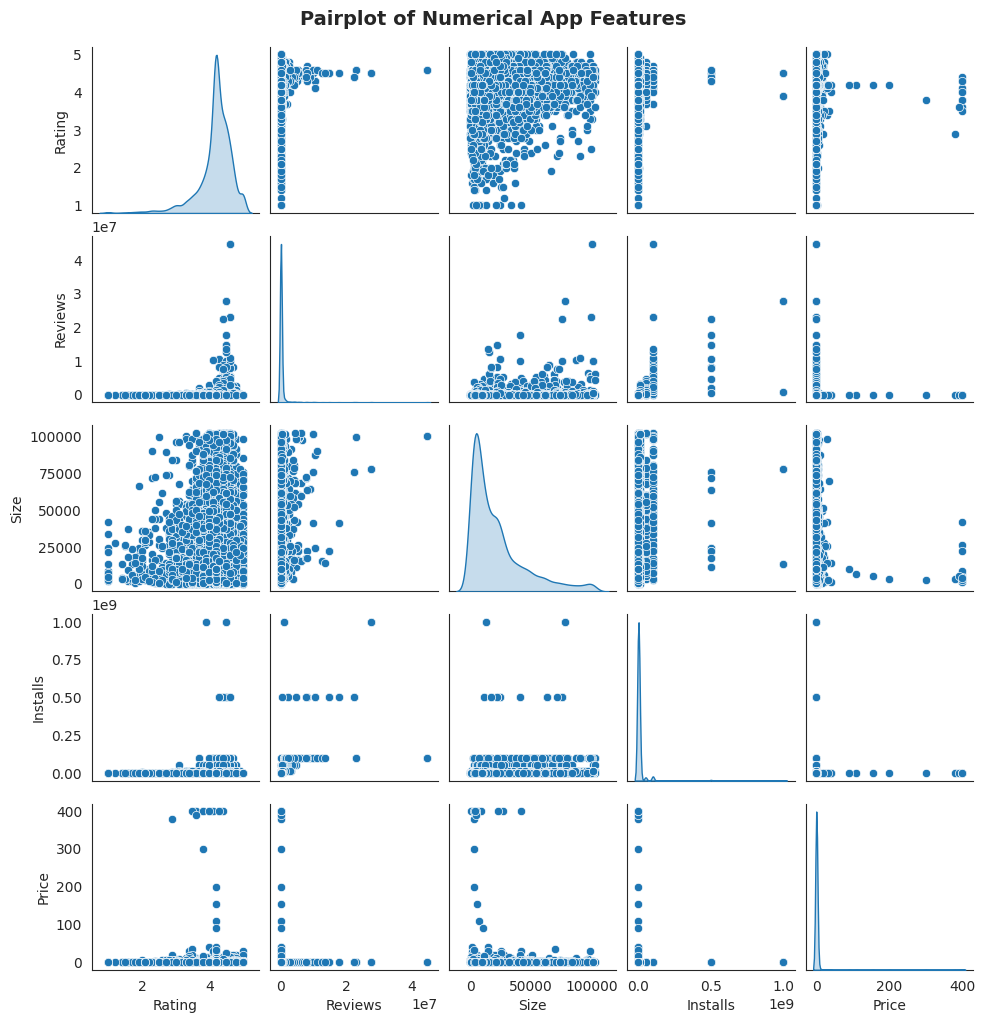

In [ ]:
numerical_cols = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']
sns.pairplot(df[numerical_cols], diag_kind='kde', height=2, palette="viridis")

plt.suptitle('Pairplot of Numerical App Features', fontsize=14, fontweight='bold', y=1.02)
plt.show()

### Density plot of Ratings

This density plot illustrates the distribution of app ratings in the dataset. The majority of apps have ratings between 4.0 and 4.5, with a sharp peak around 4.0, indicating that most apps are rated highly by users. There is a small tail towards lower ratings, but poorly rated apps are relatively rare.

<ipython-input-62-414946a3fed8>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Rating'], shade=True, color='royalblue')  # Change color to a shade of blue


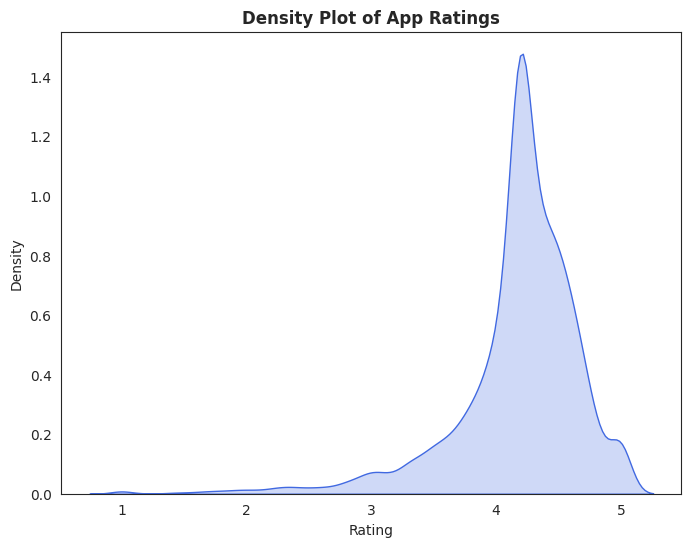

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Rating'], shade=True, color='royalblue')  # Change color to a shade of blue
plt.title('Density Plot of App Ratings', fontweight='bold') # Make title bold
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()

### Distribution of Apps by Content Ratings

This bar plot shows the distribution of apps by content rating in the dataset. The vast majority of apps, 5,959, are rated for Everyone, followed by Teen with 743 apps. Content ratings for Mature 17+, Everyone 10+, and Adults only 18+ have significantly fewer apps, indicating that most apps cater to a general audience.

<ipython-input-63-3e044d86febb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Content Rating'].value_counts().index,


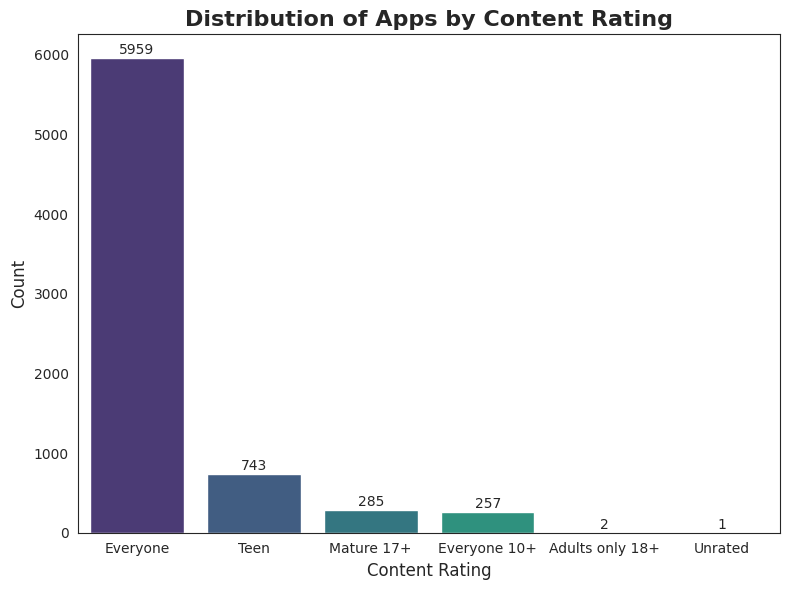

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df['Content Rating'].value_counts().index,
            y=df['Content Rating'].value_counts().values,
            palette="viridis")

plt.title('Distribution of Apps by Content Rating', fontsize=16, fontweight='bold')
plt.xlabel('Content Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)

for index, value in enumerate(df['Content Rating'].value_counts().values):
    plt.text(index, value + 50, str(value), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

### Average Rating and Number of Apps by Category

This bubble plot visualizes the average rating and the number of apps by category. Each point represents a category, where the x-axis shows the average rating, and the size of the bubbles indicates the number of apps in each category. Categories like Family and Game have the largest bubbles, indicating a high number of apps, while categories with higher average ratings, such as Video Players and Health and Fitness, have smaller but highly rated bubbles.

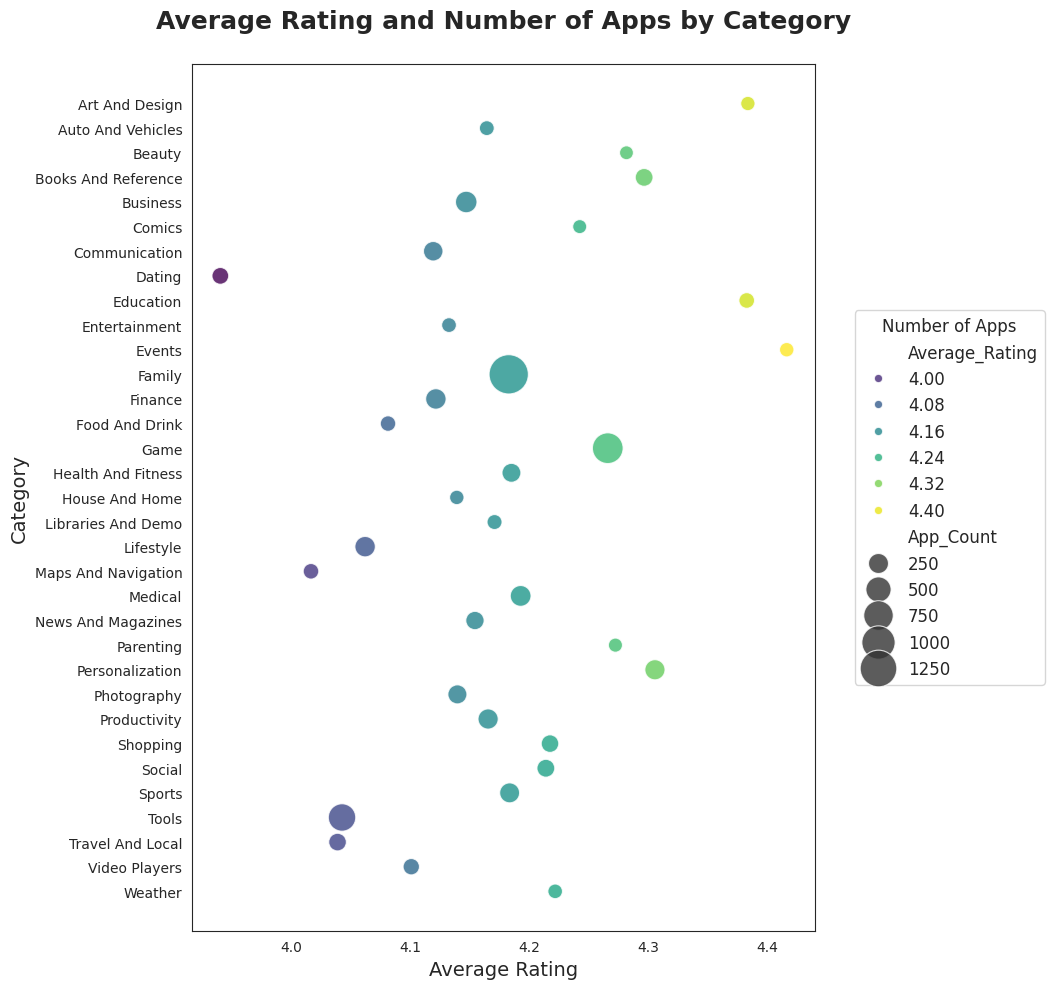

In [ ]:
plt.figure(figsize=(12, 10))

category_summary = df.groupby('Category').agg(
    Average_Rating=('Rating', 'mean'),
    App_Count=('Category', 'size')
).reset_index()

sns.scatterplot(x='Average_Rating', y='Category', size='App_Count',
                hue='Average_Rating', data=category_summary,
                sizes=(100, 800),
                palette='viridis',
                alpha=0.8)

plt.title('Average Rating and Number of Apps by Category\n', fontsize=18, fontweight='bold')
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.legend(title='Number of Apps', loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=12, title_fontsize=12)
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

In [ ]:
df.to_csv('df1_output.csv', index=False)

##Project Assignment Module 2

###Principal Component Analysis

Principal component analysis, or PCA, is a dimensionality reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [ ]:
# Select numeric columns for PCA
df1 = df[['Rating','Reviews','Size','Installs']]

In [ ]:
df1.head(10)

,Rating,Reviews,Size,Installs
0,4.3,967,2867.2,100000
1,4.4,167,5734.4,50000
2,4.1,36815,29696.0,1000000
3,4.4,13791,33792.0,1000000
4,4.4,13880,28672.0,1000000
5,4.4,8788,12288.0,1000000
6,4.2,44829,20480.0,10000000
7,4.6,4326,21504.0,100000
8,4.4,1518,37888.0,100000
9,4.7,3632,5632.0,500000


In [ ]:
df1.to_csv('df1_pca.csv', index=False)

In [ ]:
corr_matrix = df1.corr()
print(corr_matrix)

            Rating   Reviews      Size  Installs
Rating    1.000000  0.082385  0.066934  0.060080
Reviews   0.082385  1.000000  0.235546  0.645380
Size      0.066934  0.235546  1.000000  0.154824
Installs  0.060080  0.645380  0.154824  1.000000


In [ ]:
scaler = StandardScaler()
scaler.fit(df1)

StandardScaler()

In [ ]:
scaled_data = scaler.transform(df1)

In [ ]:
scaled_data

array([[ 0.25471649, -0.14927604, -0.83199524, -0.15929159],
       [ 0.45120191, -0.1497441 , -0.70590004, -0.16033198],
       [-0.13825435, -0.12830225,  0.34789553, -0.14056446],
       ...,
       [ 0.64768734, -0.14981957,  1.4287115 , -0.16126834],
       [ 1.63011445, -0.14983947, -0.79596804, -0.1613703 ],
       [ 0.04514183, -0.14984005, -0.53026745, -0.16135157]])

In [ ]:
pca=PCA(n_components=2)

In [ ]:
pca.fit(scaled_data)

PCA(n_components=2)

In [ ]:
x_pca=pca.transform(scaled_data)

In [ ]:
scaled_data.shape

(7247, 4)

In [ ]:
x_pca.shape

(7247, 2)

In [ ]:
scaled_data

array([[ 0.25471649, -0.14927604, -0.83199524, -0.15929159],
       [ 0.45120191, -0.1497441 , -0.70590004, -0.16033198],
       [-0.13825435, -0.12830225,  0.34789553, -0.14056446],
       ...,
       [ 0.64768734, -0.14981957,  1.4287115 , -0.16126834],
       [ 1.63011445, -0.14983947, -0.79596804, -0.1613703 ],
       [ 0.04514183, -0.14984005, -0.53026745, -0.16135157]])

In [ ]:
x_pca

array([[-4.52321036e-01,  9.64462285e-02],
       [-3.79489275e-01,  3.11087970e-01],
       [-7.57505348e-02, -8.79642930e-04],
       ...,
       [ 3.92409338e-01,  9.99969705e-01],
       [-2.31884194e-01,  1.39755589e+00],
       [-3.80992788e-01, -2.86813441e-02]])

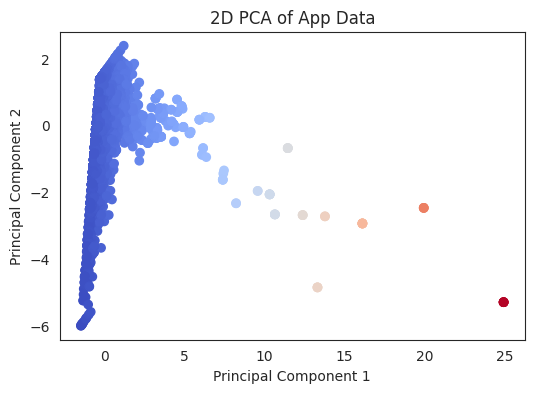

In [ ]:
# Plotting the PCA result
plt.figure(figsize=(6,4))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=x_pca[:, 0], cmap='coolwarm')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of App Data')
plt.show()

In [ ]:
#explained variance ratio
explained_variance_2d = pca.explained_variance_ratio_
print(f"Explained variance by the 2 components: {explained_variance_2d}")

Explained variance by the 2 components: [0.44145019 0.24784171]


In [ ]:
cumulative_variance_2d = np.cumsum(explained_variance_2d)
print(f"Cumulative explained variance: {cumulative_variance_2d}")

#percentage of information retained
retained_var_2d = cumulative_variance_2d[-1] * 100
print(f"Percentage of information retained in 2D dataset: {retained_var_2d:.2f}%")

Cumulative explained variance: [0.44145019 0.6892919 ]
Percentage of information retained in 2D dataset: 68.93%


In [ ]:
#Apply PCA with 3 components
pca1 = PCA(n_components=3)
pca1.fit(scaled_data)
x_pca_3d = pca1.transform(scaled_data)

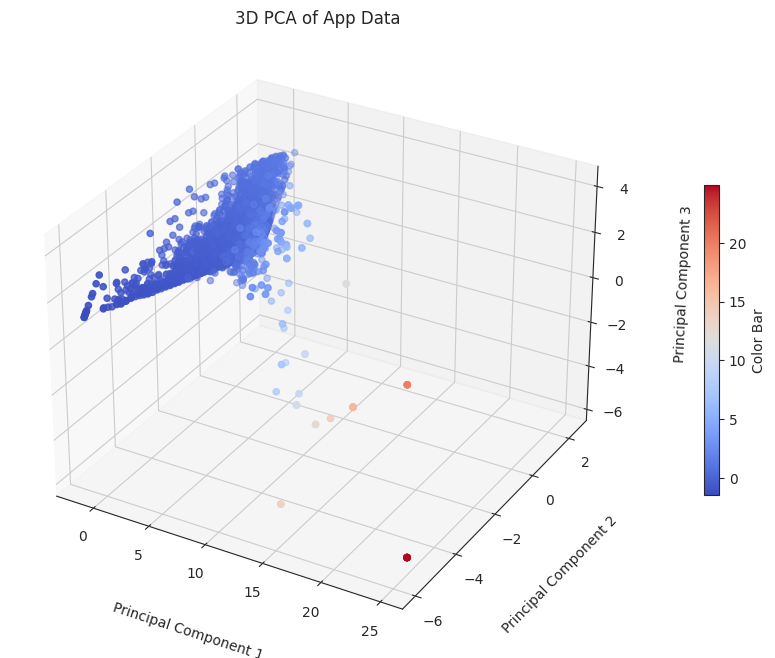

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x_pca_3d[:, 0], x_pca_3d[:, 1], x_pca_3d[:, 2], c=x_pca_3d[:, 0], cmap='coolwarm')
ax.set_xlabel('Principal Component 1', labelpad=20)
ax.set_ylabel('Principal Component 2', labelpad=20)
ax.set_zlabel('Principal Component 3', labelpad=20)
ax.set_title('3D PCA of App Data')
cbar = plt.colorbar(scatter, ax=ax, fraction=0.02, pad=0.1)
cbar.set_label('Color Bar')
plt.show()

In [ ]:
#explained variance ratio
explained_variance_3d = pca1.explained_variance_ratio_
print(f"Explained variance by the 3 components: {explained_variance_3d}")

Explained variance by the 3 components: [0.44145019 0.24784171 0.2234788 ]


In [ ]:
cumulative_variance_3d = np.cumsum(explained_variance_3d)
print(f"Cumulative explained variance: {cumulative_variance_3d}")

#percentage of information retained
retained_var_3d = cumulative_variance_3d[-1] * 100
print(f"Percentage of information retained in 3D dataset: {retained_var_3d:.2f}%")

Cumulative explained variance: [0.44145019 0.6892919  0.9127707 ]
Percentage of information retained in 3D dataset: 91.28%


In [ ]:
pca = PCA()
pca.fit(scaled_data)

PCA()

In [ ]:
#cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.44145019, 0.6892919 , 0.9127707 , 1.        ])

In [ ]:
#number of dimensions needed to retain at least 95% of the data
n_dimensions = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of dimensions to retain at least 95% of the data: {n_dimensions}")

Number of dimensions to retain at least 95% of the data: 4


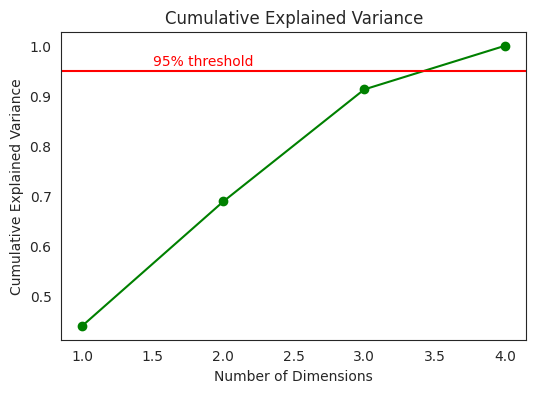

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-',color='green')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Dimensions')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(1.5, 0.96, '95% threshold', color='r')
plt.show()

In [ ]:
#top three eigenvalues
eigenvalues = pca.explained_variance_
print("Top three eigenvalues:", eigenvalues[:3])

Top three eigenvalues: [1.76604445 0.99150366 0.89403856]


##Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import DBSCAN

In [ ]:
df2 = df[['Rating','Reviews','Size','Installs','Price']]

In [ ]:
df2.to_csv('df2_clustering.csv', index=False)

In [ ]:
df2.head(10)

,Rating,Reviews,Size,Installs,Price
0,4.3,967,2867.2,100000,0.0
1,4.4,167,5734.4,50000,0.0
2,4.1,36815,29696.0,1000000,0.0
3,4.4,13791,33792.0,1000000,0.0
4,4.4,13880,28672.0,1000000,0.0
5,4.4,8788,12288.0,1000000,0.0
6,4.2,44829,20480.0,10000000,0.0
7,4.6,4326,21504.0,100000,0.0
8,4.4,1518,37888.0,100000,0.0
9,4.7,3632,5632.0,500000,0.0


In [ ]:
#Normalize the data using StandardScaler (mean = 0, stddev = 1)
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df2)

In [ ]:
#Apply PCA to reduce the dataset to 3 dimensions
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_normalized)

In [ ]:
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.sum(explained_variance) * 100

In [ ]:
print(f"Explained variance by each component: {explained_variance}")
print(f"Cumulative explained variance (percentage of variance retained in 3D): {cumulative_explained_variance:.2f}%")

Explained variance by each component: [0.3533298  0.20404126 0.19431651]
Cumulative explained variance (percentage of variance retained in 3D): 75.17%


In [ ]:
#function to perform KMeans clustering and calculate silhouette score
def find_best_kmeans(df_pca, max_k=10):
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k)
        cluster_labels = kmeans.fit_predict(df_pca)
        silhouette_avg = silhouette_score(df_pca, cluster_labels)
        silhouette_scores.append((k, silhouette_avg))
        print(f"For n_clusters = {k}, the average silhouette score is: {silhouette_avg:.4f}")
    return silhouette_scores

In [ ]:
#best values of k using silhouette score
silhouette_scores = find_best_kmeans(df_pca, max_k=10)

For n_clusters = 2, the average silhouette score is: 0.8974
For n_clusters = 3, the average silhouette score is: 0.8901
For n_clusters = 4, the average silhouette score is: 0.6637
For n_clusters = 5, the average silhouette score is: 0.4318
For n_clusters = 6, the average silhouette score is: 0.5687
For n_clusters = 7, the average silhouette score is: 0.4326
For n_clusters = 8, the average silhouette score is: 0.4246
For n_clusters = 9, the average silhouette score is: 0.4123
For n_clusters = 10, the average silhouette score is: 0.4346


In [ ]:
#top 3 values of k based on the silhouette scores
best_k_values = sorted(silhouette_scores, key=lambda x: x[1], reverse=True)[:3]
best_k_values = [k for k, _ in best_k_values]
print(f"Best values for k based on silhouette scores: {best_k_values}")


Best values for k based on silhouette scores: [2, 3, 4]


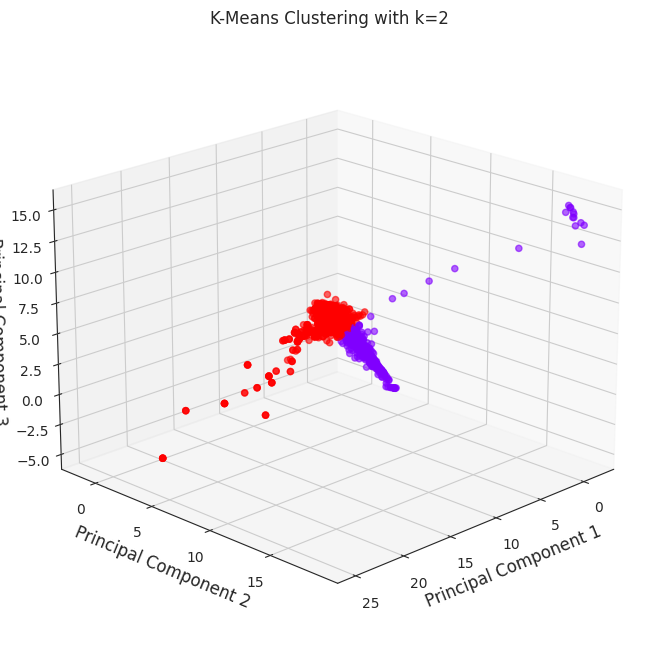

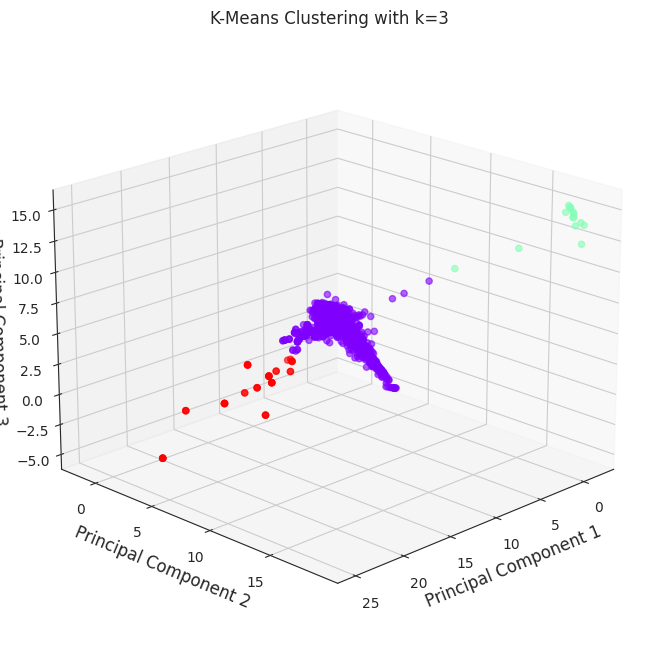

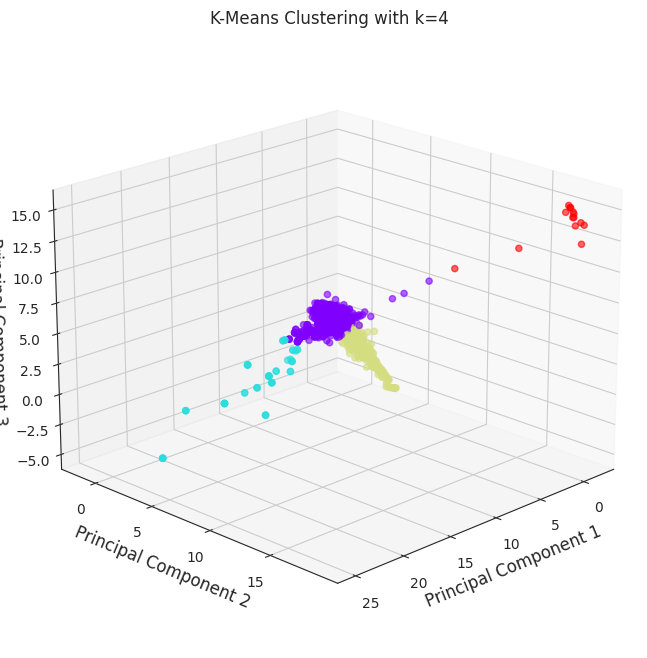

In [ ]:
#Plot the clusters for each value of k
for k in best_k_values:
  kmeans = KMeans(n_clusters=k)
  cluster_labels = kmeans.fit_predict(df_pca)
  centroids = kmeans.cluster_centers_
  fig = plt.figure(figsize=(8, 8))
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=cluster_labels, cmap='rainbow', alpha=0.6)
  #ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='black', s=200, marker='+', label='Centroids')
  ax.set_xlabel('Principal Component 1', fontsize=12)
  ax.set_ylabel('Principal Component 2', fontsize=12)
  ax.set_zlabel('Principal Component 3', fontsize=12)
  ax.set_title(f'K-Means Clustering with k={k}')
  ax.view_init(elev=20, azim=45)
  plt.show()


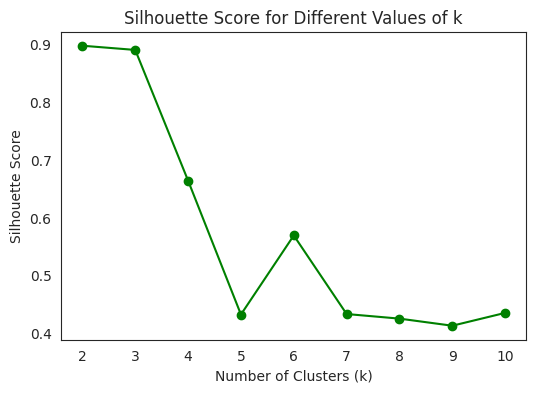

In [ ]:
#silhouette scores for plotting
k_values = [score[0] for score in silhouette_scores]
silhouette_values = [score[1] for score in silhouette_scores]

#silhouette scores as a line graph
plt.figure(figsize=(6, 4))
plt.plot(k_values, silhouette_values, marker='o', linestyle='-', color='g')
plt.title('Silhouette Score for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

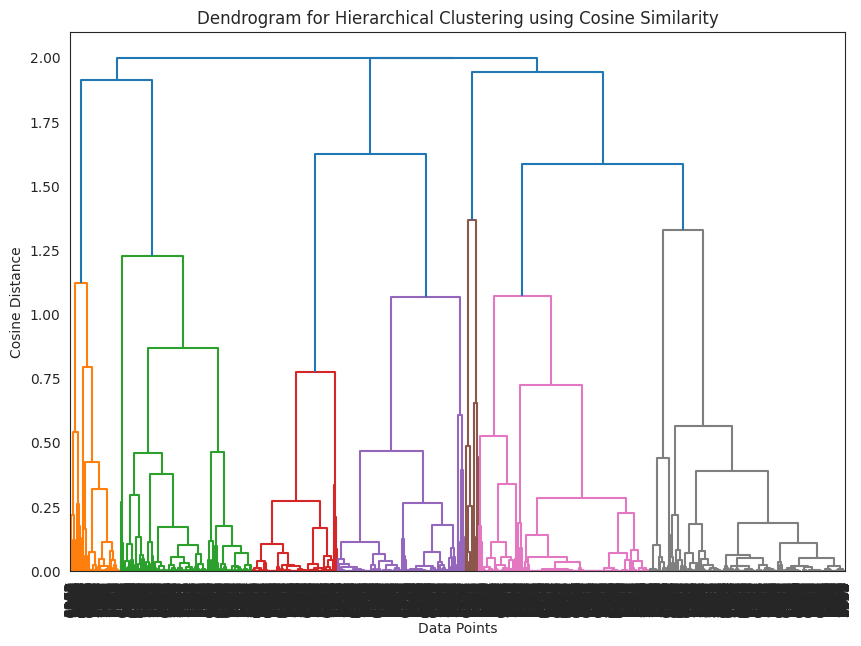

In [ ]:
cosine_dist_matrix = pdist(df_pca, metric='cosine')
#hierarchical clustering using cosine similarity
Z = linkage(cosine_dist_matrix, method='complete')

plt.figure(figsize=(10,7))
plt.title('Dendrogram for Hierarchical Clustering using Cosine Similarity')
dendrogram(Z, leaf_rotation=90, leaf_font_size=10, color_threshold=1.5)
plt.xlabel('Data Points')
plt.ylabel('Cosine Distance')
plt.show()

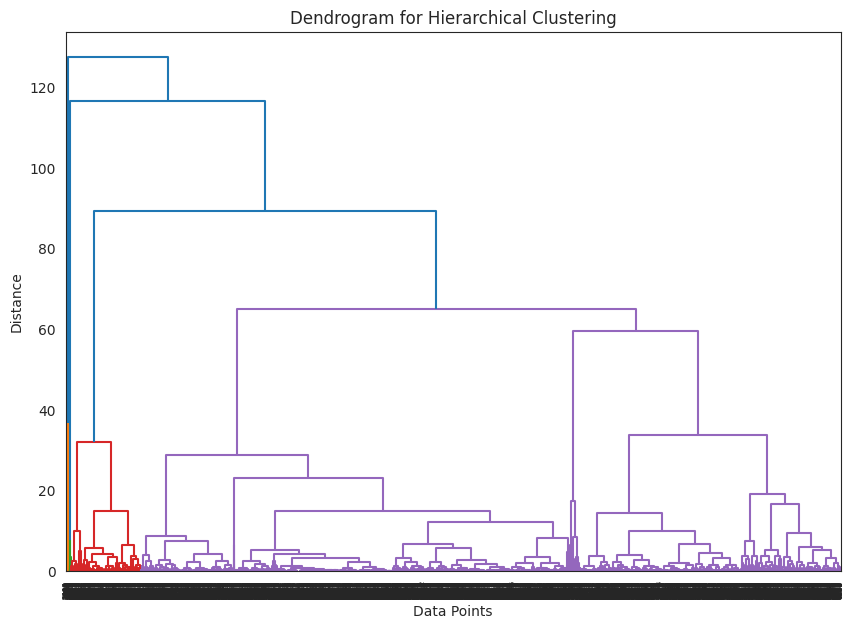

In [ ]:
#hierarchical clustering using 'ward' linkage
Z = linkage(df_pca, method='ward')
plt.figure(figsize=(10, 7))
plt.title('Dendrogram for Hierarchical Clustering')
dendrogram(Z)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [ ]:
#Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(df_pca)

DBSCAN()

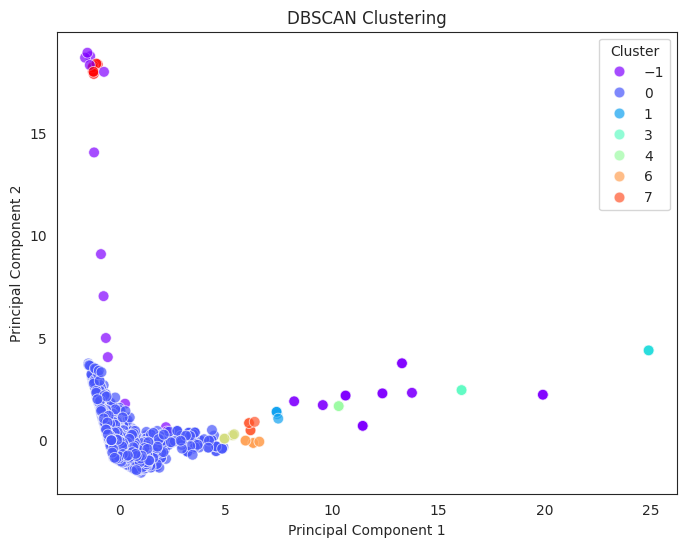

In [ ]:
dbscan_labels = dbscan.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=dbscan_labels, palette='rainbow', s=60, alpha=0.7)
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster")
plt.show()

In [ ]:
#number of clusters and noise points
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)  # "-1" represents noise points
n_noise = list(dbscan_labels).count(-1)

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

Number of clusters: 9
Number of noise points: 43


##ARM

In [ ]:
!pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx

In [ ]:
df_encoded = pd.get_dummies(df[['Category', 'Type', 'Content Rating', 'Genres']])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
new_df =  df[['Category', 'Type', 'Content Rating', 'Genres']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
new_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Category,Type,Content Rating,Genres
0,Art And Design,Free,Everyone,Art & Design
1,Art And Design,Free,Everyone,Art & Design
2,Art And Design,Free,Everyone,Art & Design
3,Art And Design,Free,Everyone,Art & Design
4,Art And Design,Free,Everyone,Art & Design
...,...,...,...,...
7242,Family,Free,Everyone,Education
7243,Business,Free,Everyone,Business
7244,Family,Free,Everyone,Education
7245,Family,Free,Everyone,Education


In [ ]:
new_df.to_csv('df_arm.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#binary column for high rating (Rating >= 4.5)
df_encoded['High Rating'] = df['Rating'].apply(lambda x: 1 if x >= 4.5 else 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#binary column for paid apps (Price > 0)
df_encoded['Paid App'] = df['Price'].apply(lambda x: 1 if x > 0 else 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_encoded

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Category_Art And Design,Category_Auto And Vehicles,Category_Beauty,Category_Books And Reference,Category_Business,Category_Comics,Category_Communication,Category_Dating,Category_Education,Category_Entertainment,...,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,High Rating,Paid App
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7242,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0
7243,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0
7244,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,0
7245,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,0


In [ ]:
# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.201739,(Category_Family)
1,0.114116,(Category_Game)
2,0.920933,(Type_Free)
3,0.822271,(Content Rating_Everyone)
4,0.102525,(Content Rating_Teen)
5,0.264661,(High Rating)
6,0.184214,"(Category_Family, Type_Free)"
7,0.157858,"(Content Rating_Everyone, Category_Family)"
8,0.104595,"(Category_Game, Type_Free)"
9,0.753829,"(Content Rating_Everyone, Type_Free)"


In [ ]:
#Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
#Generate association rules with lower thresholds for confidence and lift
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Convert the support column to numeric (if it's not already in numeric format)
frequent_itemsets['support'] = pd.to_numeric(frequent_itemsets['support'], errors='coerce')
rules['confidence'] = pd.to_numeric(rules['confidence'], errors='coerce')
rules['lift'] = pd.to_numeric(rules['lift'], errors='coerce')


top_15_support = frequent_itemsets.nlargest(15, 'support').reset_index(drop=True)
top_15_confidence = rules.nlargest(15, 'confidence').reset_index(drop=True)
top_15_lift = rules.nlargest(15, 'lift').reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print the results
print("\nTop 15 Frequent Itemsets by Support:")
top_15_support


Top 15 Frequent Itemsets by Support:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.920933,(Type_Free)
1,0.822271,(Content Rating_Everyone)
2,0.753829,"(Content Rating_Everyone, Type_Free)"
3,0.264661,(High Rating)
4,0.238581,"(High Rating, Type_Free)"
5,0.216917,"(High Rating, Content Rating_Everyone)"
6,0.201739,(Category_Family)
7,0.196219,"(High Rating, Type_Free, Content Rating_Everyone)"
8,0.184214,"(Category_Family, Type_Free)"
9,0.157858,"(Content Rating_Everyone, Category_Family)"


In [ ]:
print("\nTop 15 Association Rules by Confidence:")
top_15_confidence[['antecedents', 'consequents', 'support', 'confidence', 'lift']]



Top 15 Association Rules by Confidence:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
0,(Content Rating_Everyone),(Type_Free),0.753829,0.916765,0.995474
1,(Category_Game),(Type_Free),0.104595,0.916566,0.995258
2,(Category_Family),(Type_Free),0.184214,0.913133,0.991530
3,"(Content Rating_Everyone, Category_Family)",(Type_Free),0.144060,0.912587,0.990938
4,"(High Rating, Content Rating_Everyone)",(Type_Free),0.196219,0.904580,0.982243
5,(High Rating),(Type_Free),0.238581,0.901460,0.978855
6,"(High Rating, Type_Free)",(Content Rating_Everyone),0.196219,0.822441,1.000206
7,(High Rating),(Content Rating_Everyone),0.216917,0.819604,0.996756
8,(Type_Free),(Content Rating_Everyone),0.753829,0.818550,0.995474
9,(Category_Family),(Content Rating_Everyone),0.157858,0.782490,0.951620


In [ ]:
print("\nTop 15 Association Rules by Lift:")
top_15_lift[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


Top 15 Association Rules by Lift:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
0,"(High Rating, Type_Free)",(Content Rating_Everyone),0.196219,0.822441,1.000206
1,(Content Rating_Everyone),"(High Rating, Type_Free)",0.196219,0.238631,1.000206
2,(High Rating),(Content Rating_Everyone),0.216917,0.819604,0.996756
3,(Content Rating_Everyone),(High Rating),0.216917,0.263803,0.996756
4,(Content Rating_Everyone),(Type_Free),0.753829,0.916765,0.995474
5,(Type_Free),(Content Rating_Everyone),0.753829,0.818550,0.995474
6,(Category_Game),(Type_Free),0.104595,0.916566,0.995258
7,(Type_Free),(Category_Game),0.104595,0.113575,0.995258
8,(Type_Free),(Category_Family),0.184214,0.200030,0.991530
9,(Category_Family),(Type_Free),0.184214,0.913133,0.991530


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


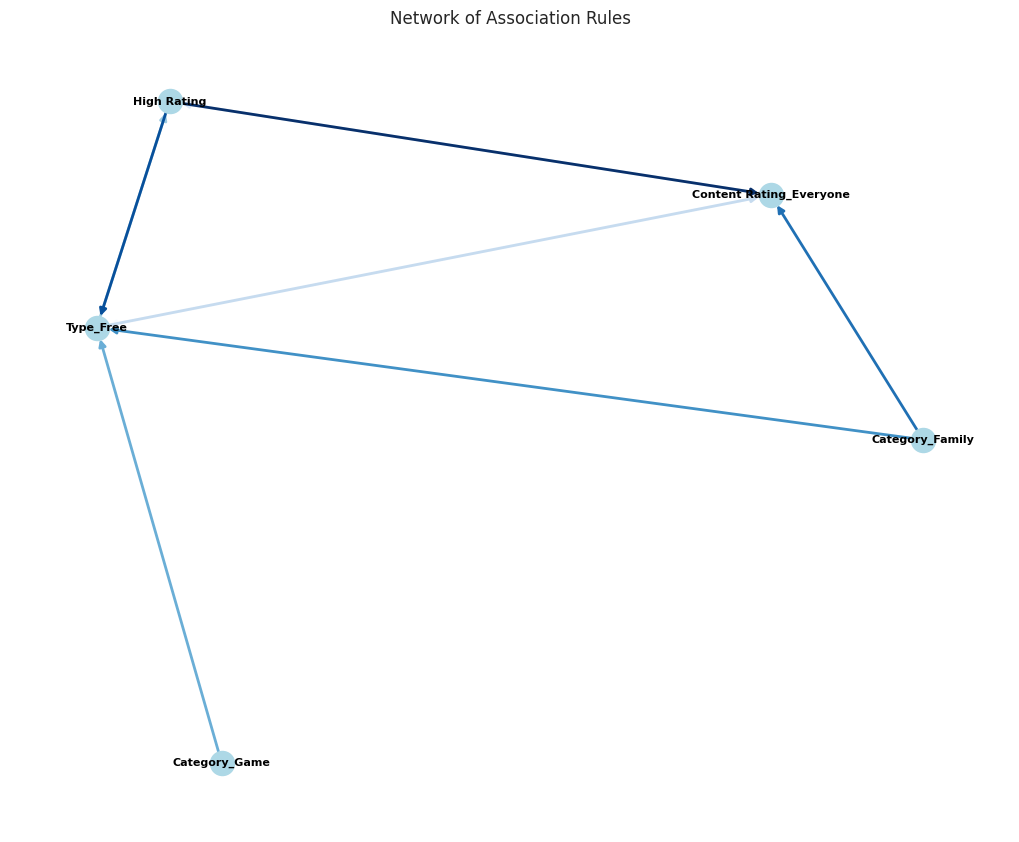

In [ ]:
#Visualize the top 15 rules by confidence as a network
def draw_network(rules):
    G = nx.DiGraph()

    for i, rule in rules.iterrows():
        for antecedent in rule['antecedents']:
            for consequent in rule['consequents']:
                G.add_edge(antecedent, consequent, weight=rule['lift'])

    plt.figure(figsize=(10,8))
    pos = nx.spring_layout(G, k=0.5, iterations=50)
    nx.draw(G, pos, with_labels=True, node_size=300, node_color="lightblue", font_size=8, font_weight="bold", edge_color=range(len(G.edges())), edge_cmap=plt.cm.Blues, width=2.0)
    plt.title('Network of Association Rules')
    plt.show()

draw_network(top_15_confidence)
